In [5]:
import sys
sys.path.append("..")
import jsq_ps_new.models as jsq
import aux.models as aux
import pandas as pd
import ciw
import tqdm
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

In [6]:
data = {}
for R in tqdm.tqdm(range(1, 10)):
    data[R] = {}
    for rho in [0.85, 0.9, 0.95]:
        lambda_ = 10
        mu = lambda_ / (R * rho)
        max_time = 20000
        warmup = 1000
        S = jsq.Simulation(lambda_=lambda_, mu=mu, R=R, max_time=max_time, warmup=warmup, tracker=ciw.trackers.NodePopulation(), ps_bar=False, times=[0, 0.1])
        S.run(seed=0)
        pmf = S.Q.statetracker.state_probabilities(observation_period=(warmup, max_time-warmup))
        probs = []
        for mc_limit in range(1, 23):
            running_prob = 0.0
            for state in pmf:
                if any([s > mc_limit for s in state]):
                    running_prob += pmf[state]
            probs.append(running_prob)
        data[R][rho] = probs

100%|███████████████████████████████████████████| 9/9 [16:42<00:00, 111.35s/it]


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  if sys.path[0] == '':


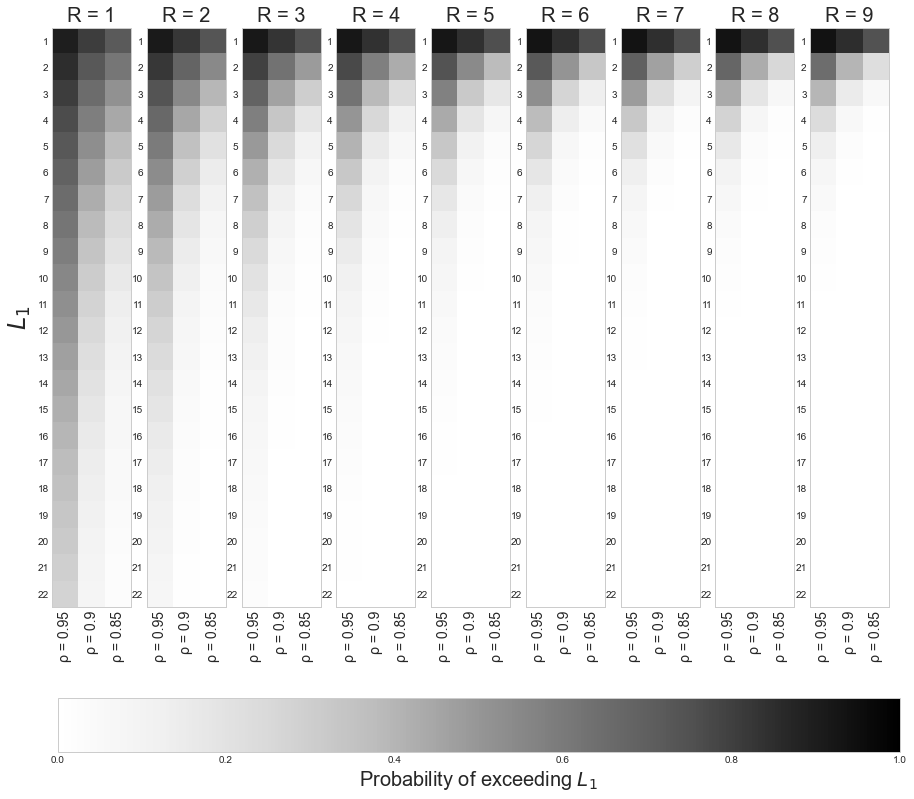

In [42]:
fig, axarr = plt.subplots(1, 9, figsize=(15, 15))
for i in range(9):
    im = axarr[i].imshow(np.matrix([data[i+1][rho] for rho in [0.95, 0.9, 0.85]]).T, vmin=0, vmax=1, cmap='Greys')
    axarr[i].set_xticks([0, 1, 2])
    axarr[i].set_xticklabels(["ρ = 0.95", "ρ = 0.9", "ρ = 0.85"], rotation=90, fontsize=14)
    axarr[i].set_yticks(range(0, 22))
    axarr[i].set_yticklabels(range(1, 23))
    axarr[i].set_title(f"R = {i+1}", fontsize=20)
    axarr[i].grid(None)
axarr[0].set_ylabel(r'$L_1$', fontsize=24)
cax = fig.add_axes([0.13, 0.1, 0.78, 0.05])
cbar = fig.colorbar(im, cax=cax, orientation='horizontal')
cbar.set_label(r'Probability of exceeding $L_1$', fontsize=20)
# plt.subplots_adjust(top=1.15)
plt.savefig('mc-limit.pdf', bbox_inches = 'tight')